## Building Machine Learning Pipelines: Data Analysis Phase

In [1]:
# we will focus on creating machine learning pipelines
# considering all the lifecycle of data science projects

## Project name : House Prices : Advanced Regression Techniques

In [2]:
# the main aim of this project is to predict the house price based
# on various features which we will discuss 

## All the life cycles in data science projects

In [4]:
# 1) Data analysis
# 2) Feature Engineering
# 3) Feature Selection
# 4) Model Building
# 5) Model Deployment

In [5]:
# Data analysis phase
## main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# displaying all columns of the dataset
pd.pandas.set_option('display.max_columns', None)

In [10]:
dataset = pd.read_csv('datasets/ahp_train.csv')

In [11]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
# in the above table we have nearly 81 features
dataset.shape

(1460, 81)

### In data Analysis we Analyze to find out the below stuff 

In [17]:
# 1) Missing values
# 2) All the numerical Variables
# 3) Distribution of numerical variables
# 4) Categorical Variable
# 5) Cardinality of categorical Variables
# 6) Outliers
# 7) Relationship between independent and dependent feature(SalePrice)

In [18]:
# the analysis of missing values is important as we need to know what to 
# do with those values, either we need to drop those or if these give some
# significant impact on the dependent variable then we need to kepp it, and 
# change the value to an appropriate value(the approriate value will be discussed later)


# Distribution of numerical variables is required, as far as i think it is the
# frequency of occourance of the stuff is taken to see if there is enough data to 
# validate our prediction ,maybe which metric to use to judge the model etc.. 

# Categrical variable need to be encoded into some digital form to feed into the
# model, so maybe that's what we are talking here

# Cardinality of categroical feature, there could be a huge cardnality of categorical feature
# which may cause to encode into large number of columns, i don't know how we will
# deal with it, let's find out in the course

# Outliers , identifying the outliers is required, based on outliers your model
# can give not so good best fit line etc, so it is required to handle them correctly


# The relationship between dependent and independent feature is what 
# actually we are looking at, based on that we make our predictions


### Missing Values

In [29]:
feature_list = dataset.columns.to_list()

In [31]:
# lets check teh percentage of null values present in each feature
## step 1 : make a list of features having missing values

features_with_na = [x for x in feature_list if dataset[x].isnull().values.any()]

In [34]:
print(features_with_na)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


###### sns.heatmap(dataset[features_with_na])
i tried to use sns.heatmap but it threw the error that it contains values with string as input and we know we need to encode it before giving it to our heatmap.. let's do it later if required

In [ ]:
## step 2: print the feature name and percentage of missing values
for feature in features_with_na:
    null_val = dataset[feature].isnull().sum()
    print(feature,"---", round(null_val/1460,4))

### Since there are many missing values , we need to find the relationship between missing values and sales price

let's plot some diagram for it 

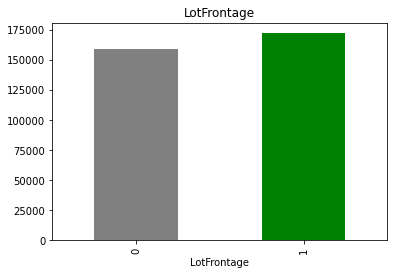

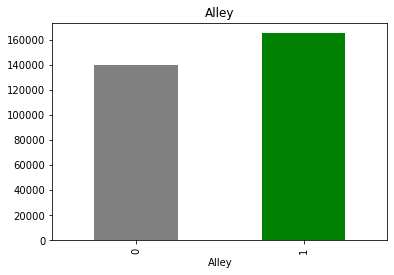

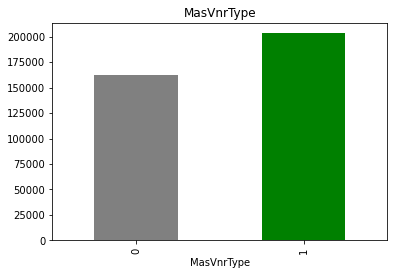

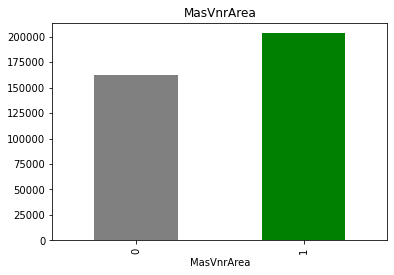

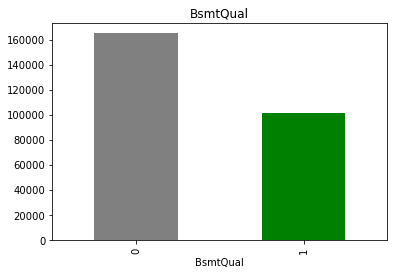

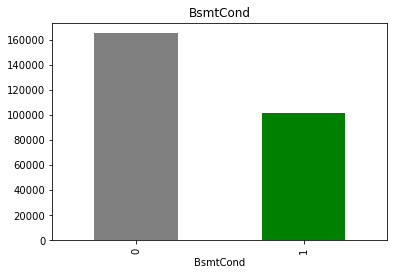

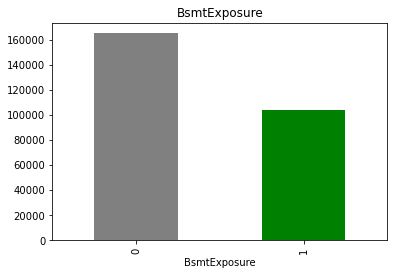

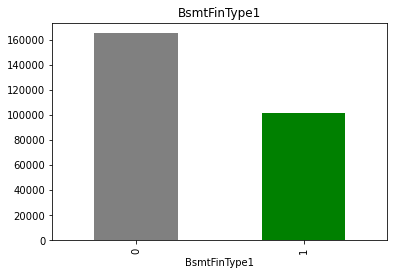

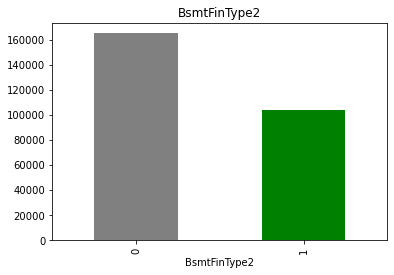

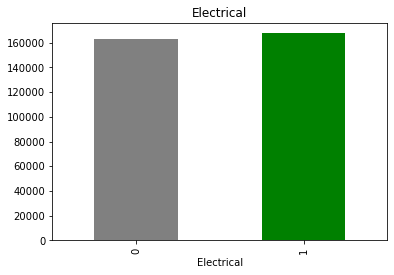

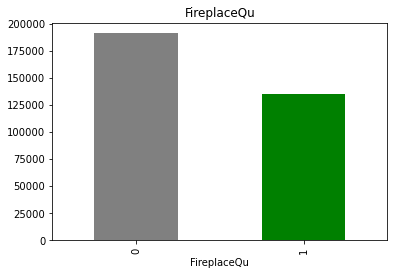

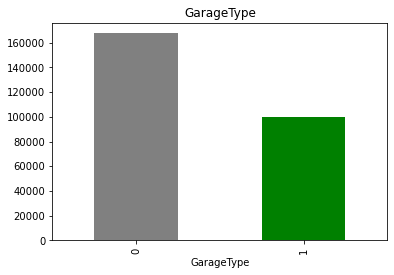

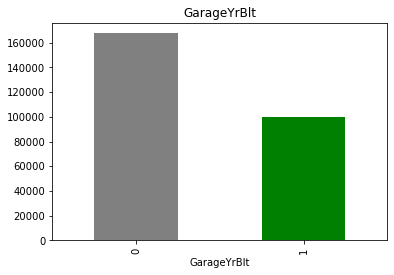

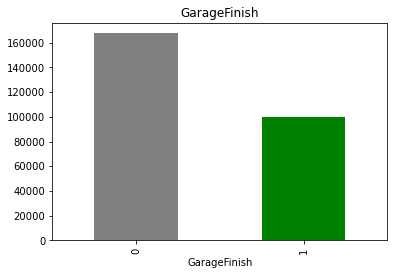

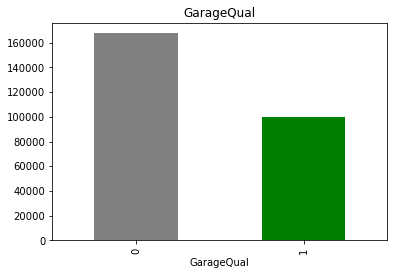

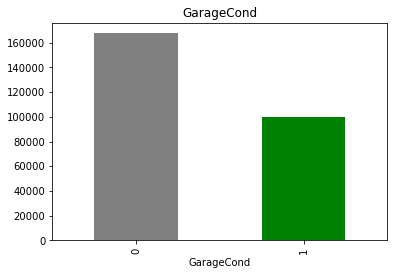

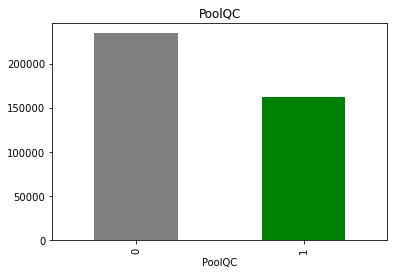

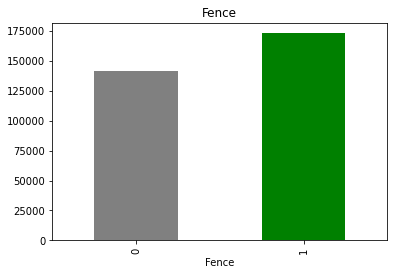

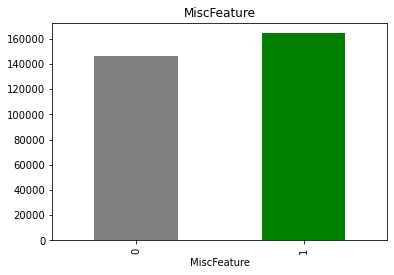

In [48]:
for feature in features_with_na:
    data = dataset.copy()
    
    # lets make a variable that indicates 1 if the observation was missing
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Let's caluclate the mean SalesPrice where the information is missing or zero otherwise
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['grey', 'green'])
    plt.title(feature)
    plt.show()

where ever we had a null val, that has a higher median sales price, so that defnitely plays an important role....
I didn't get this completely so refer it back next time you come here

Here with the relation between the missing values and the dependent variable is clearly visible. so we need to replace these nan values with something meaningful which we will do in the feature engineering section

In [54]:
# from the above dataset some of the features that are not required, we can drop it
datalen = len(dataset.Id)
print(f"Id of houses {datalen}")

Id of houses 1460


### Numerical Variables

In [57]:
# list of numerical variables, remember when you saw the datatype of string column it showed 'O', use it here
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables : ', len(numerical_features))

# visualize the numerical variables
dataset[numerical_features].head()

Number of numerical variables :  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Temporal Variables( Eg: Datetime Variables)

from the Dataset we have 4 year variables. we have extract information from the datetime variables like no of years or number of days. One example in this specfic scenario can be difference in years between the year the house was build and the year the house was sold. We will be performing this analysis in Feature Engineering which is next video

### Mynote
basically what we are doing here is that we have various parameters that we need to see to predict the house price, just imagine how much important the feature like when it was build and how old it is to determine the price, so we need to extract those information from the dataset which is involving year

In [59]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [60]:
# exploring the content's of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

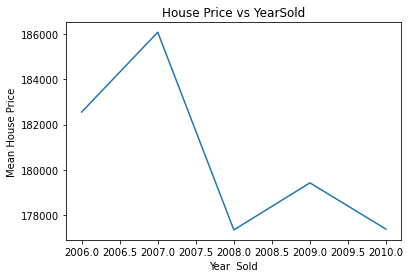

In [62]:
# let's analyze the temporal datetime variables
## we will check weather there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].mean().plot()
plt.xlabel('Year  Sold')
plt.ylabel('Mean House Price')
plt.title('House Price vs YearSold')

Text(0.5, 1.0, 'House Price vs YearSold')

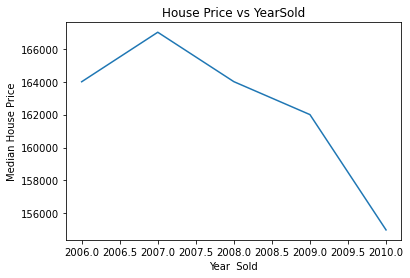

In [63]:
# actually median was taken by kirsh which is more meaningfull i guess, the above one i have taken the mean

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year  Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs YearSold')

In [65]:
# we see some abnormality, guess what the prices are lowering as year passed, but this
# should not be true, as time goes it should be more expensive isn't it.. ??
# let's see why this happens, for that we may need to dig into data deeper

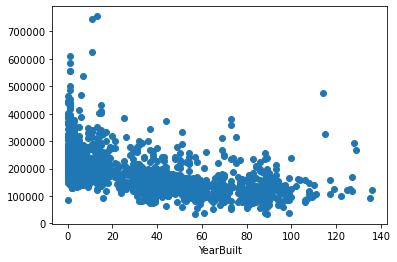

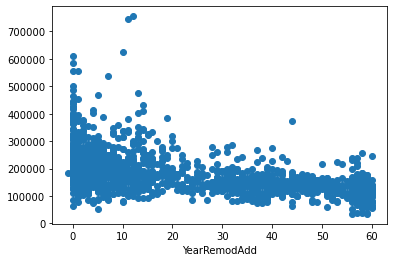

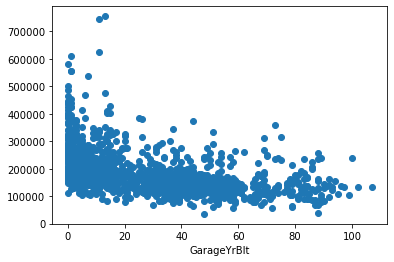

In [73]:
## here we will compare the difference between all years feature with salesprice
import matplotlib.pyplot as plt
%matplotlib inline

for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()
        ## we will capture the difference between year variable and year the house was sold for
        data[feature] = data['YrSold'] - data[feature]
        plt.figure()
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)

In [79]:
# Numerical variables are usually of 2 type
# 1. continous variable and discrete variables

# didn't completely understand this but as per the best of my understanding its like orginazing the 
# values that come with a frequency of having unique features < 25 

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())< 25 and feature not in year_feature+['Id']]
print(len(discrete_feature))



17


In [81]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


let's find the relation between the discrete feature and salses price

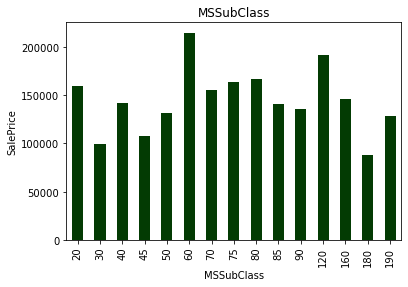

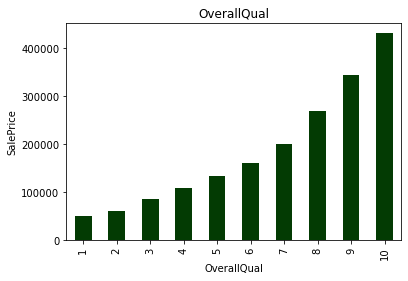

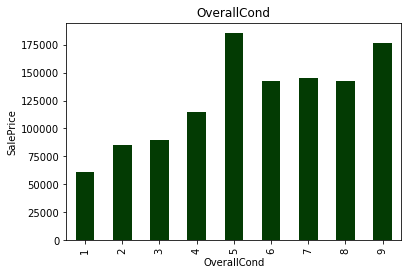

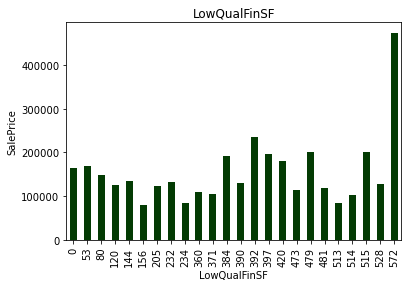

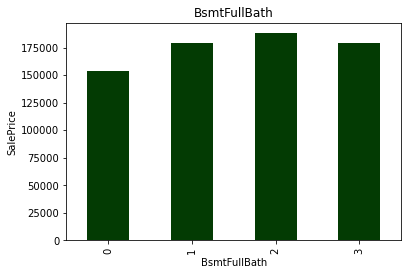

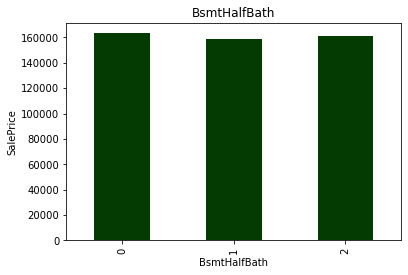

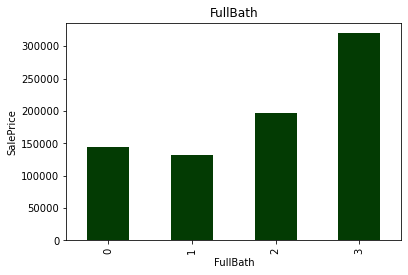

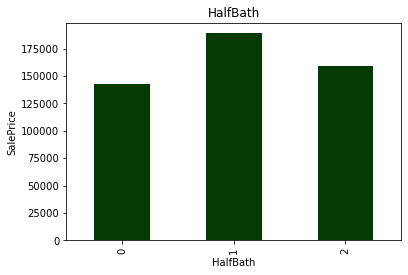

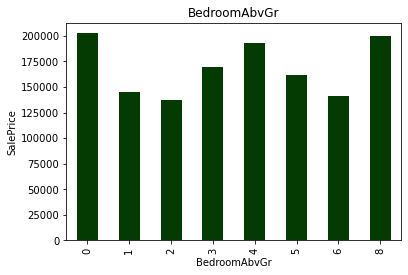

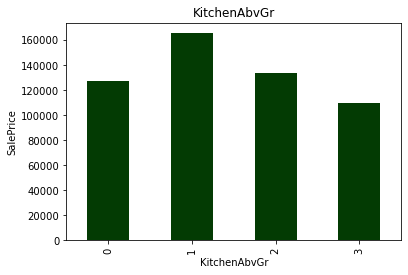

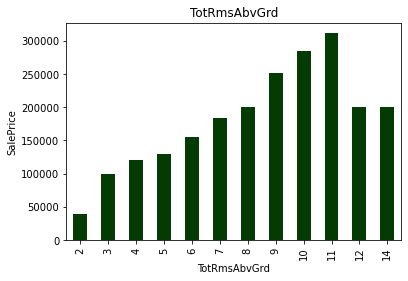

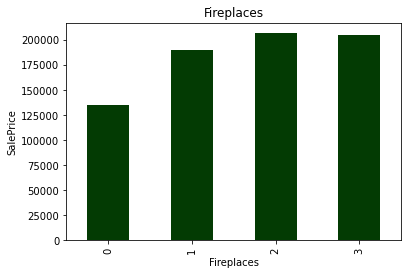

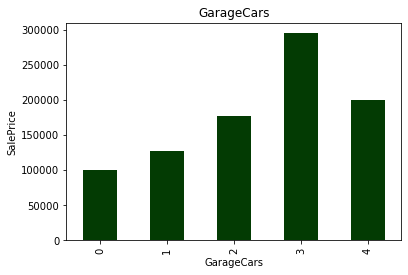

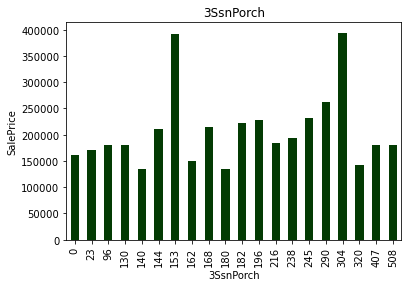

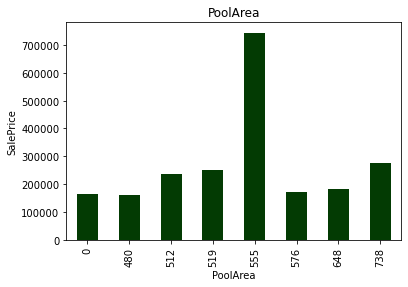

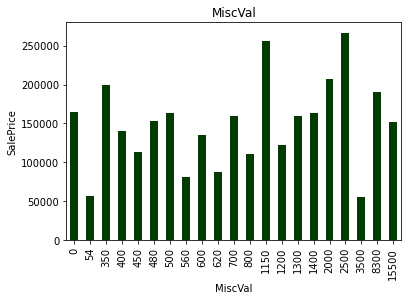

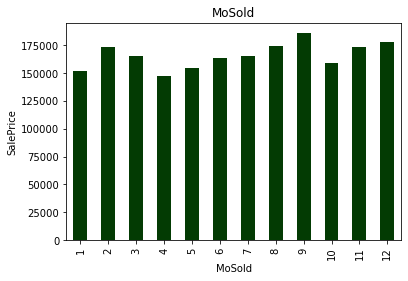

In [100]:
for feature in discrete_feature:
    data = dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=[(.012, .23, .0111)])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Continous Variable

In [104]:
continous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continous_feature)))

Continuous feature Count 16
